<h1>Support Vector Machines</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import HTML
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, make_moons
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, LinearSVR
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

<h2>SVM classification</h2>

<p>Let's start with <b>classification</b> using SVM. The SVM classifier sets the largest possible wide band between classes, it's called large margin classification. The edges of this band are located on the extreme samples of classes, as if relying on them, these samples are called support vectors. SVM methods are very sensitive to feature scale, so it is very important to scale features.<br>Feature of SVM is another loss function to minimize you must pass through all training samples, considering the "margin": \begin{equation} \large M = y_{i}X_{i} \cdot w^{T} \end{equation} and if it is greater than or equal to 1, then we classify correctly, if less, something is wrong and need to do a gradient step.<br> Loss function called <b>Hinge loss</b>: \begin{equation} \large \sum_{i} max[0.1 - M_{i}] \end{equation} The issue we solve there is called <b>constrained optimization</b>.</p>

In [2]:
class Hard_Margin_SVC:
    '''
    Class Hard Margin SVM performs the SVM method for binary classification
    It's sensitive for outliers and feature scales
    Data type: X - column-like features with shape (num_points, num_features),
    y - column-like target with shape (num_points, 1) (only binary classification 0 and 1)
    
    Parameters:
    lr - learning rate for gradient descent,
    n_epochs - number of training epochs (times)
    '''
    
    def __init__(self, lr=0.01, n_epochs=200):
        self.lr = lr
        self.n_epochs = n_epochs
        self.loss_history = dict()
        self.weights_history = []
        
    def make_y(self, y): # is used for making y from (0, 1)-type to (-1, 1)-type
        return (y > 0).astype(np.int64) * 2 - 1
    
    def fit(self, X_train, y_train, X_val=None, y_val=None): # training model
        y_train = self.make_y(y_train)
        
        self.w = np.random.normal(0, 0.01, size=(1, X_train.shape[1]))
        self.b = np.zeros(shape=(1))
        self.loss_history['train'] = []
        if X_val is not None and y_val is not None:
            y_val = self.make_y(y_val)
            self.loss_history['val'] = []
            
        for _ in range(self.n_epochs):
            train_loss = 0
            val_loss = 0
            
            for i in range(len(X_train)):
                margin = y_train[i] * (X_train[i] @ self.w.T + self.b)
                if margin >= 1:
                    self.w -= 0 #correct prediction
                    self.b -= 0
                else:
                    self.w -= self.lr * (-X_train[i] * y_train[i])  #incorrect prediction, gradient step
                    self.b -= -self.lr * y_train[i]
                    
                train_loss += self.hinge_loss(X_train[i], y_train[i])
                if X_val is not None and y_val is not None:
                    val_loss += self.hinge_loss(X_val[i], y_val[i])
                    
            self.loss_history['train'].append(train_loss)
            if X_val is not None and y_val is not None:
                self.loss_history['val'].append(val_loss)
    
    def predict(self, X): # make predictions
        return np.sign(X @ self.w.T + self.b) / 2 + 1 / 2
    
    def hinge_loss(self, X, y): # loss function for hard margin
        return np.max((0, 1 - y * (X @ self.w.T + self.b)))

<p>Let's upload our data</p>

In [3]:
data = load_iris()
X = data.data[:,(2, 3)][data.target < 2]
y = data.target[data.target < 2]

<p>And plot two types of irises for visualization.</p>

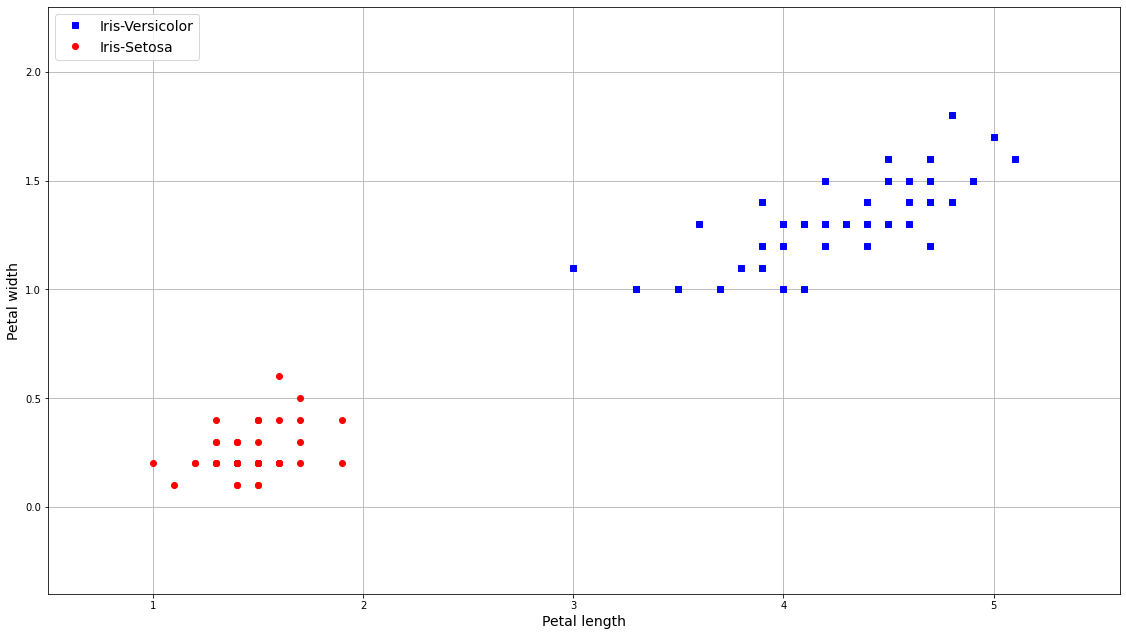

In [4]:
def plot_data(X, y):
    fig = plt.figure(figsize=(19.20, 10.80))
    ax = plt.axes()
    ax.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
    ax.plot(X[:, 0][y==0], X[:, 1][y==0], "ro", label="Iris-Setosa")
    ax.set_xlabel("Petal length", fontsize=14)
    ax.set_ylabel("Petal width", fontsize=14)
    ax.legend(loc="upper left", fontsize=14)
    ax.axis([X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, X[:, 1].min() - 0.5, X[:, 1].max() + 0.5])
    ax.grid(True)
    plt.show()
    
plot_data(X, y)

In [5]:
Hard_margin_preprocessor = Pipeline([
                                    ('scaler', StandardScaler())
                                    ])
X = Hard_margin_preprocessor.fit_transform(X)
y = y.reshape(-1, 1) # for training

In [6]:
hrd_svm_clf = Hard_Margin_SVC(n_epochs=1000, lr=0.001)

In [7]:
hrd_svm_clf.fit(X, y)

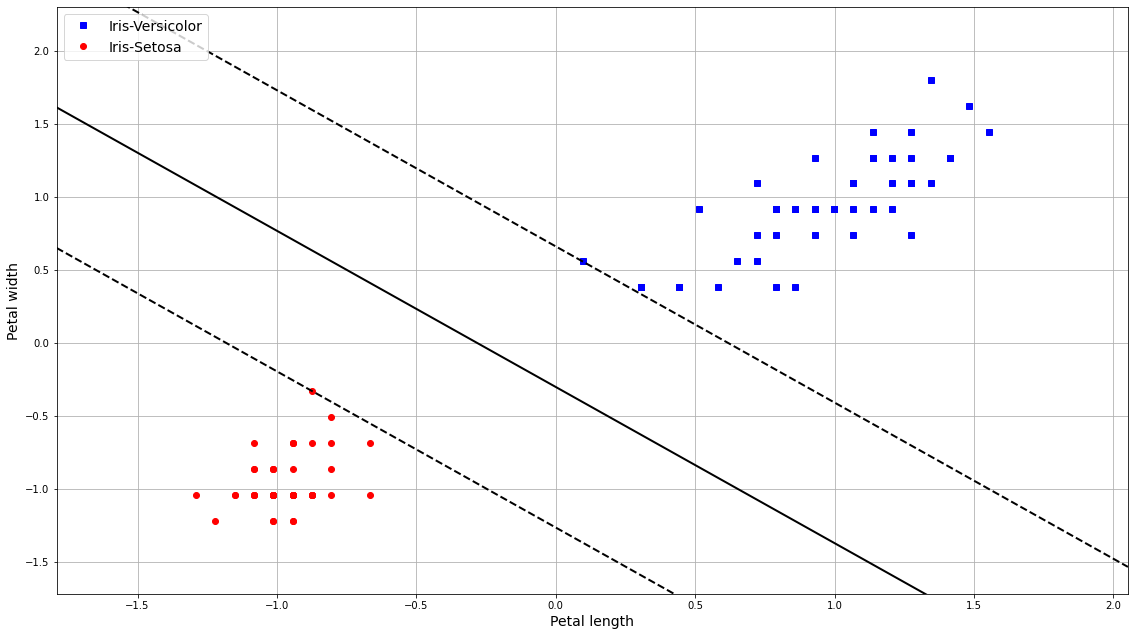

In [8]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.w[0]
    b = svm_clf.b

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    margin = 1 / w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

y = data.target[data.target < 2]
fig = plt.figure(figsize=(19.20, 10.80))
ax = plt.axes()
axes = [X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, X[:, 1].min() - 0.5, X[:, 1].max() + 0.5]
ax.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
ax.plot(X[:, 0][y==0], X[:, 1][y==0], "ro", label="Iris-Setosa")
plot_svc_decision_boundary(hrd_svm_clf, X[:, 0].min() - 0.5, X[:, 0].max() + 0.5)
ax.set_xlabel("Petal length", fontsize=14)
ax.set_ylabel("Petal width", fontsize=14)
ax.legend(loc="upper left", fontsize=14)
ax.axis(axes)
ax.grid(True)
plt.show()

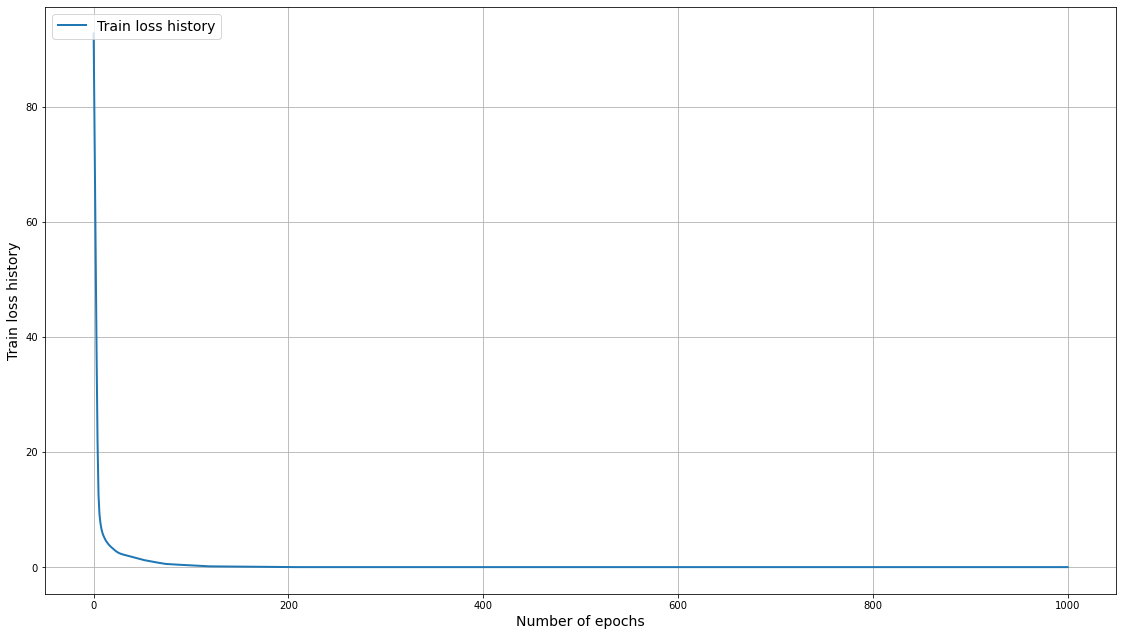

In [9]:
fig = plt.figure(figsize=(19.20, 10.80))
ax = plt.axes()
ax.plot(np.linspace(0, len(hrd_svm_clf.loss_history['train']), len(hrd_svm_clf.loss_history['train'])),\
        hrd_svm_clf.loss_history['train'], linewidth=2, label='Train loss history')
ax.set_xlabel("Number of epochs", fontsize=14)
ax.set_ylabel("Train loss history", fontsize=14)
ax.legend(loc="upper left", fontsize=14)
ax.grid(True)
plt.show()

<p>This is how hard margin classification works, but it has a few problems. It works only with linear separable classes and it is sensitive to outliers. But we can solve that problem with <b>soft margin</b> classification.</p>

<p>The Hinge loss function will be turned into <b>soft margin loss</b> function, the difference between them is the added term: \begin{equation} \large Q =max[0,1- M_i] + \alpha(w^Tw)/2 \end{equation}</p>

In [10]:
class Soft_Margin_SVC:
    '''
    Class Soft Margin SVM performs the SVM method for binary classification
    Data type: X - column-like features with shape (num_points, num_features),
    y - column-like target with shape (num_points, 1) (only binary classification 0 and 1)
    
    Parameters:
    lr - learning rate for gradient descent,
    n_epochs - number of training epochs (times)
    alpha - coefficient for soft margin loss
    '''
    
    def __init__(self, lr=0.01, n_epochs=200, alpha=0.1):
        self.lr = lr
        self.n_epochs = n_epochs
        self.alpha = alpha
        self.loss_history = dict()
        self.weights_history = []
        
    def make_y(self, y): # is used for making y from (0, 1)-type to (-1, 1)-type
        return (y > 0).astype(np.int64) * 2 - 1
    
    def fit(self, X_train, y_train, X_val=None, y_val=None): # training model
        y_train = self.make_y(y_train)
        
        self.w = np.random.normal(0, 0.01, size=(1, X_train.shape[1]))
        self.b = np.zeros(shape=(1))
        self.loss_history['train'] = []
        if X_val is not None and y_val is not None:
            y_val = self.make_y(y_val)
            self.loss_history['val'] = []
            
        for _ in range(self.n_epochs):
            train_loss = 0
            val_loss = 0
            
            for i in range(len(X_train)):
                margin = y_train[i] * (X_train[i] @ self.w.T + self.b)
                if margin >= 1:
                    self.w -= self.lr * self.alpha * self.w #correct prediction
                    self.b -= 0
                else:
                    self.w -= self.lr * (-X_train[i] * y_train[i]\
                                         + self.alpha * self.w) #incorrect prediction
                    self.b -= self.lr * (-y_train[i])
                    
                train_loss += self.soft_margin_loss(X_train[i], y_train[i])
                if X_val is not None and y_val is not None:
                    val_loss += self.soft_margin_loss(X_val[i], y_val[i])
                    
            self.loss_history['train'].append(train_loss)
            if X_val is not None and y_val is not None:
                self.loss_history['val'].append(val_loss)
    
    def predict(self, X): # make predictions
        return np.sign(X @ self.w.T + self.b) / 2 + 1 / 2
    
    def soft_margin_loss(self, X, y):
        return np.max((0, 1 - y * (X @ self.w.T + self.b))) + ((self.alpha * self.w @ self.w.T) / 2).reshape(-1)
    
    def decision_function(self, X):
        return X @ self.w.T + self.b

In [11]:
X = data.data[:,(2, 3)][data.target < 2]
y = data.target[data.target < 2]

In [12]:
Soft_margin_preprocessor = Pipeline([
#                                     ('extender', PolynomialFeatures(degree=1)),
                                    ('scaler', StandardScaler())
                                    ])
X = Soft_margin_preprocessor.fit_transform(X)
y = y.reshape(-1, 1) # for training

In [13]:
sft_svm_clf = Soft_Margin_SVC(alpha=0.1, n_epochs=1000)

In [14]:
sft_svm_clf.fit(X, y)

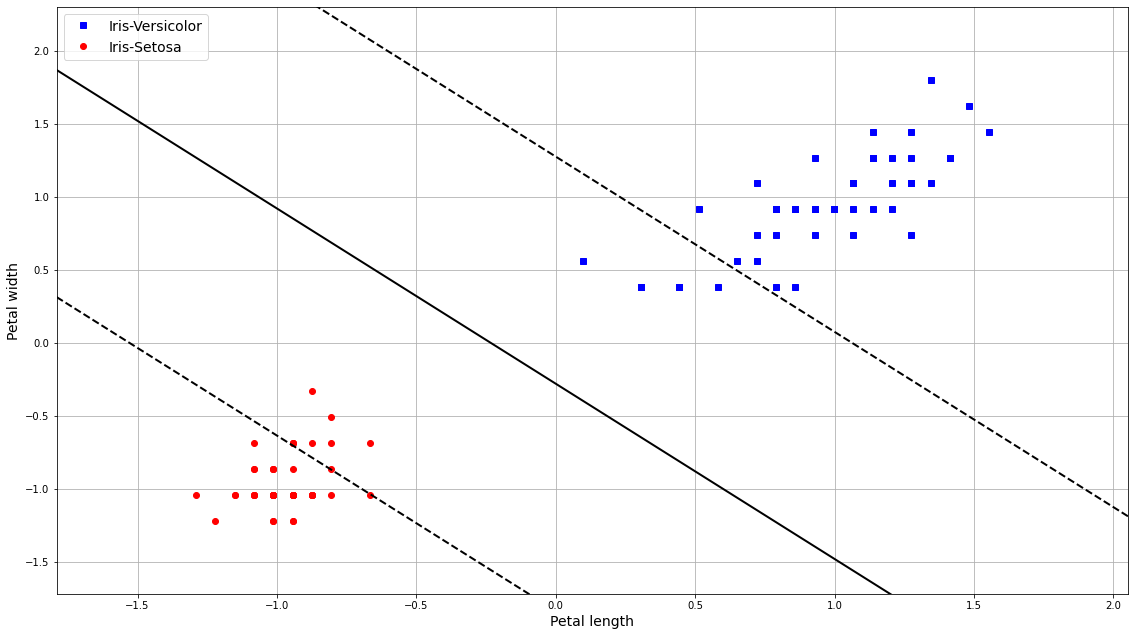

In [15]:
y = y.reshape(-1)
fig = plt.figure(figsize=(19.20, 10.80))
ax = plt.axes()
axes = [X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, X[:, 1].min() - 0.5, X[:, 1].max() + 0.5]
ax.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
ax.plot(X[:, 0][y==0], X[:, 1][y==0], "ro", label="Iris-Setosa")
plot_svc_decision_boundary(sft_svm_clf, X[:, 0].min() - 0.5, X[:, 0].max() + 0.5)
ax.set_xlabel("Petal length", fontsize=14)
ax.set_ylabel("Petal width", fontsize=14)
ax.legend(loc="upper left", fontsize=14)
ax.axis(axes)
ax.grid(True)
plt.show()

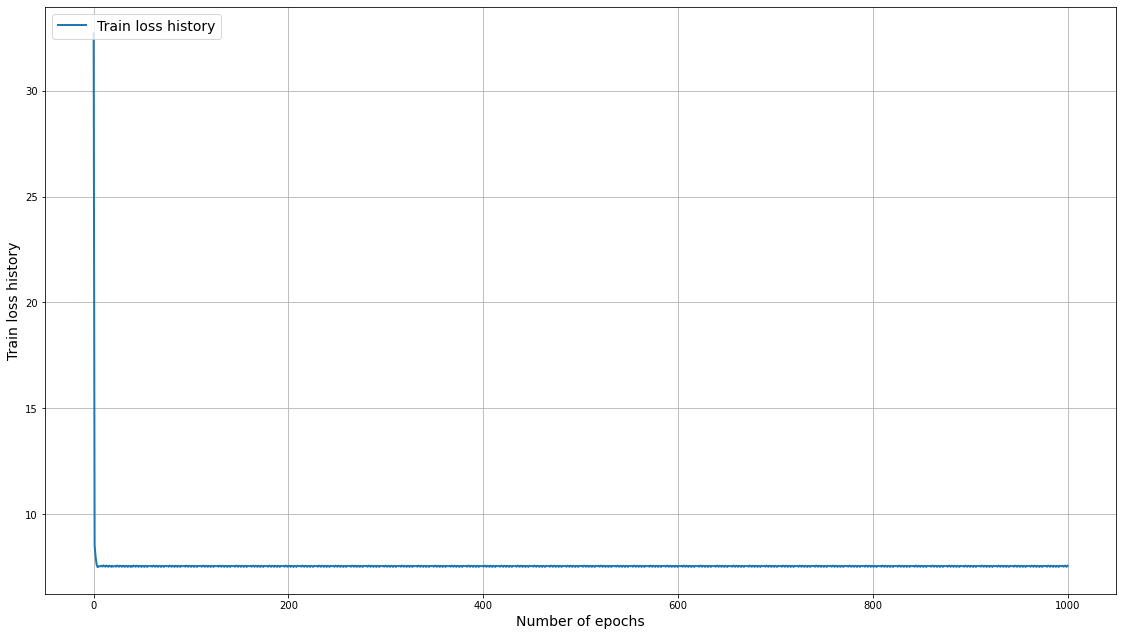

In [16]:
fig = plt.figure(figsize=(19.20, 10.80))
ax = plt.axes()
ax.plot(np.linspace(0, len(sft_svm_clf.loss_history['train']), len(sft_svm_clf.loss_history['train'])),\
        sft_svm_clf.loss_history['train'], linewidth=2, label='Train loss history')
ax.set_xlabel("Number of epochs", fontsize=14)
ax.set_ylabel("Train loss history", fontsize=14)
ax.legend(loc="upper left", fontsize=14)
ax.grid(True)
plt.show()

<p>As we can see, a soft-margin classification will work even if there are outliers, as opposed to a hard-margin classification. Also note that we need to scale features for a classification with a soft margin.</p>

<h2>Non-Linear SVM classification</h2>

In [17]:
X, y = make_moons(n_samples=1000, noise=0.40, random_state=42)

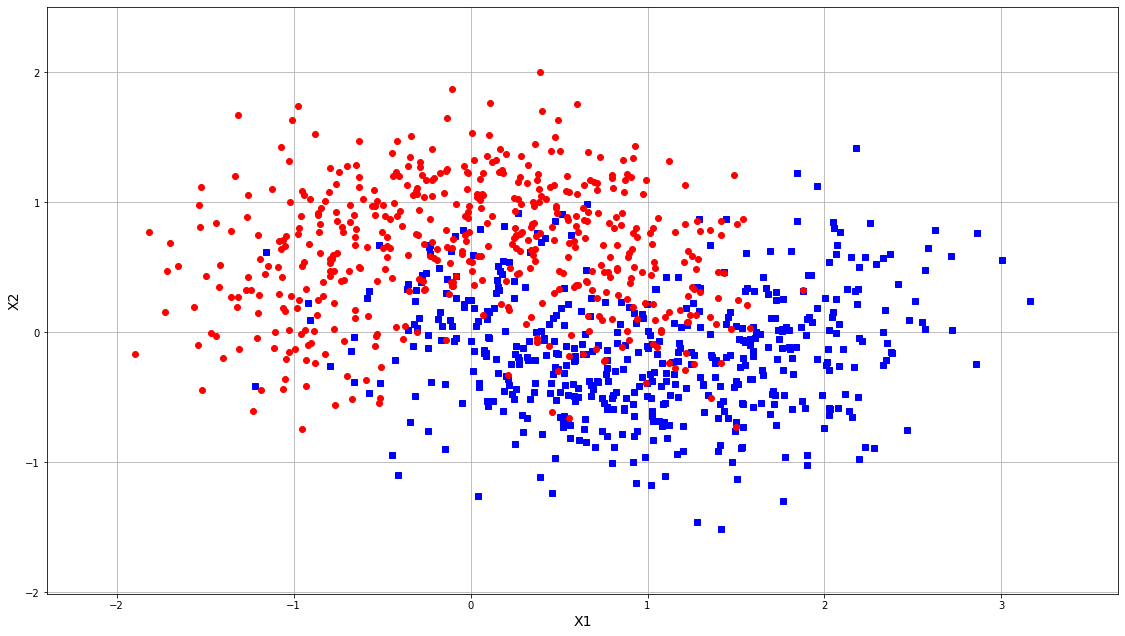

In [18]:
fig = plt.figure(figsize=(19.20, 10.80))
ax = plt.axes()
ax.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
ax.plot(X[:, 0][y==0], X[:, 1][y==0], "ro")
ax.set_xlabel("X1", fontsize=14)
ax.set_ylabel("X2", fontsize=14)
ax.axis([X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, X[:, 1].min() - 0.5, X[:, 1].max() + 0.5])
ax.grid(True)
plt.show()

<p>Just as we did for polynomial regression, we can introduce polynomial features for nonlinear SVM classification. Next, we normalize them using StandardScaler().<br> <b>Important note</b>, we normalize the training sample relative to zero, calculating its average value and standard deviation, then in order to make predictions with this model, we do the same steps, only we normalize <b>using the average value and standard deviation of the training sample</b>. We normalize the features for predicting not relative to zero, but relative to the training sample.</p>

In [19]:
Non_lin_preprocessor = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=3, include_bias=False)),
    ('skaler', StandardScaler())
])
X_train = Non_lin_preprocessor.fit_transform(X)

In [20]:
n_sft_clf = Soft_Margin_SVC(alpha=0.001, n_epochs=1000)
n_sft_clf.fit(X_train, y)

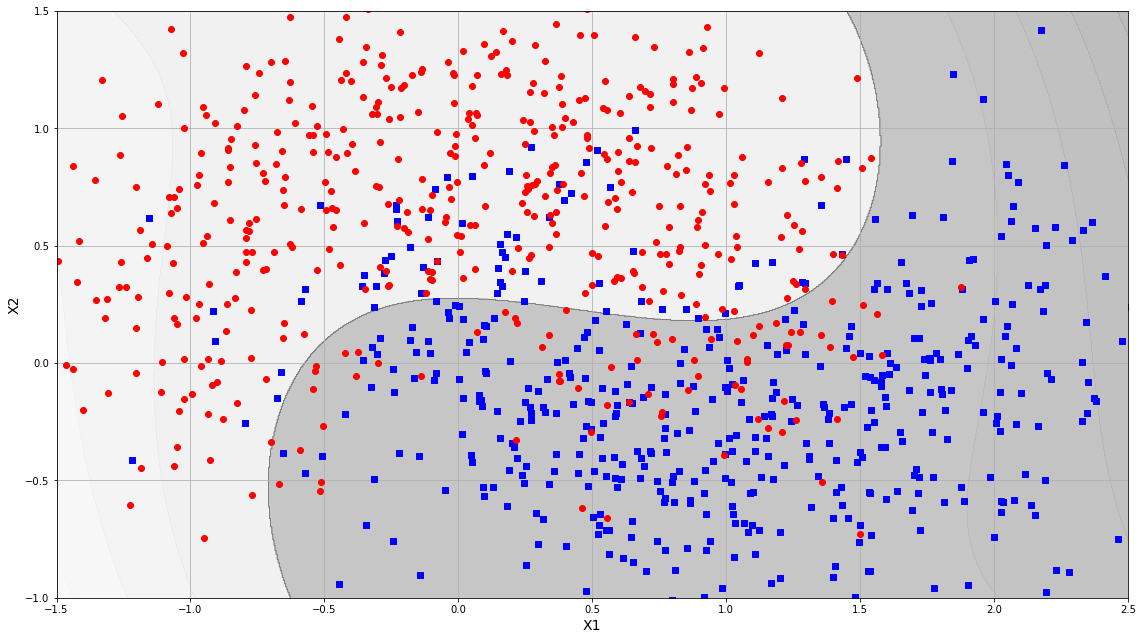

In [21]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 1000).reshape(-1, 1)
    x1s = np.linspace(axes[2], axes[3], 1000).reshape(-1, 1)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    X = Non_lin_preprocessor.transform(X) #transform, not fit_transform
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    ax.contourf(x0, x1, y_pred, cmap=plt.cm.binary, alpha=0.2)
    ax.contourf(x0, x1, y_decision, cmap=plt.cm.binary, alpha=0.1)

axes = [X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, X[:, 1].min() - 0.5, X[:, 1].max() + 0.5]
fig = plt.figure(figsize=(19.20, 10.80))
ax = plt.axes()
ax.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
ax.plot(X[:, 0][y==0], X[:, 1][y==0], "ro") 
ax.set_xlabel("X1", fontsize=14)
ax.set_ylabel("X2", fontsize=14)
ax.axis([-1.5, 2.5, -1, 1.5])
ax.grid(True)
plot_predictions(n_sft_clf, [-1.5, 2.5, -1, 1.5])
plt.show()

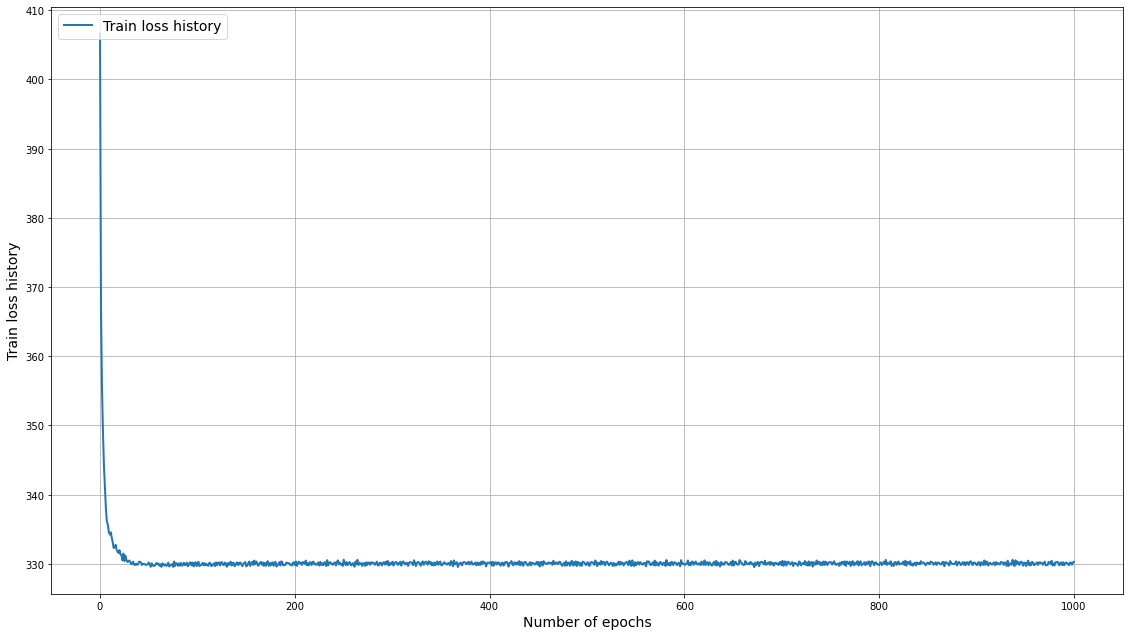

In [22]:
fig = plt.figure(figsize=(19.20, 10.80))
ax = plt.axes()
ax.plot(np.linspace(0, len(n_sft_clf.loss_history['train']), len(n_sft_clf.loss_history['train'])),\
        n_sft_clf.loss_history['train'], linewidth=2, label='Train loss history')
ax.set_xlabel("Number of epochs", fontsize=14)
ax.set_ylabel("Train loss history", fontsize=14)
ax.legend(loc="upper left", fontsize=14)
ax.grid(True)
plt.show()

<p>To compare our model with sklearn's.</p>

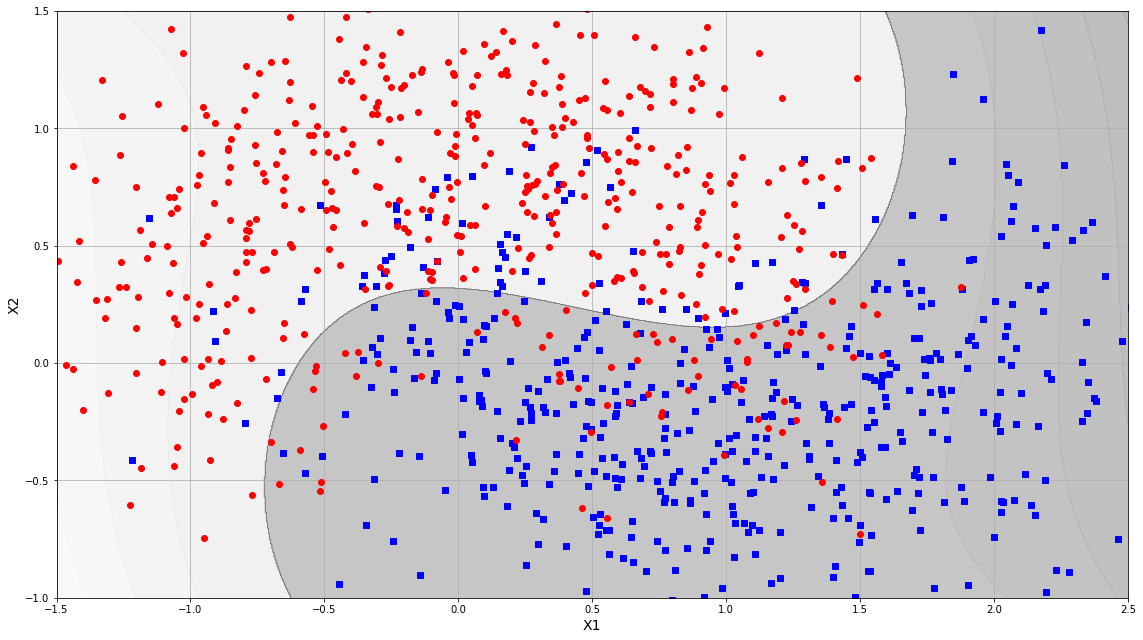

In [23]:
skl_svc = LinearSVC(loss='hinge', random_state=42, C=10, fit_intercept=True)
skl_svc.fit(X_train, y)

axes = [X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, X[:, 1].min() - 0.5, X[:, 1].max() + 0.5]
fig = plt.figure(figsize=(19.20, 10.80))
ax = plt.axes()
ax.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
ax.plot(X[:, 0][y==0], X[:, 1][y==0], "ro") 
ax.set_xlabel("X1", fontsize=14)
ax.set_ylabel("X2", fontsize=14)
ax.axis([-1.5, 2.5, -1, 1.5])
ax.grid(True)
plot_predictions(skl_svc, [-1.5, 2.5, -1, 1.5])
plt.show()

In [24]:
n_sft_clf.w, n_sft_clf.b, skl_svc.coef_, skl_svc.intercept_

(array([[ 0.235796  , -1.62348568, -1.94837204, -0.62108638, -0.2954204 ,
          3.03467871,  0.98682041,  0.14621986,  0.62840437]]),
 array([0.11]),
 array([[ 0.1151133 , -1.68867189, -2.44481875, -0.5579646 , -0.4042698 ,
          3.93585304,  0.88309397, -0.01250096,  0.85056013]]),
 array([0.09114769]))

<h2>SVM Regression</h2>

<p>To solve the regression problem using the SVM method, we use reverse logic. we need as many samples as possible to be inside the line bounded by the hyperparameter $\varepsilon$. Thus, our task is to minimize the <b>$\varepsilon$-sensitivity</b> function: \begin{equation} \large \sum_{i=0}^{l} max[0, |y - (X \cdot w + b)| - \varepsilon] + \frac{\alpha}{2} w^Tw \end{equation}</p>

In [25]:
class SVMRegressor:
    '''
    Class SVMRegressor performs the SVM method for regression
    Data type: X - column-like features with shape (num_points, num_features),
    y - column-like target with shape (num_points, 1)
    
    Parameters:
    lr - learning rate for gradient descent,
    n_epochs - number of training epochs (times)
    alpha - coefficient for soft margin loss
    epsilon - the width of the gap
    '''
    
    def __init__(self, lr=0.01, n_epochs=200, alpha=0.1, epsilon=0.5):
        self.lr = lr
        self.n_epochs = n_epochs
        self.alpha = alpha
        self.loss_history = dict()
        self.weights_history = []
        self.epsilon = epsilon
        self.lr_d = 1
        
    def eta(self, epoch): # we reduce learning rate during epochs
        return self.lr / (epoch + self.lr_d)
    
    def fit(self, X_train, y_train, X_val=None, y_val=None): # training model
        
        self.w = np.random.normal(0, 0.01, size=(1, X_train.shape[1]))
        self.b = np.zeros(shape=(1), dtype=np.float64())
        self.loss_history['train'] = []
            
        for _ in range(self.n_epochs):
            train_loss = 0
            
            for i in range(len(X_train)):
                margin = np.abs(y_train[i] - (X_train[i] @ self.w.T + self.b))
                if margin < self.epsilon:
                    self.w -= self.eta(_) * self.alpha * self.w #correct prediction
                    self.b -= 0
                else:
                    if y_train[i] - (X_train[i] @ self.w.T + self.b) > 0:
                        self.w -= self.eta(_) * (-X_train[i]\
                                             + self.alpha * self.w) #incorrect prediction
                        self.b -= -self.eta(_)
                    elif y_train[i] - (X_train[i] @ self.w.T + self.b) < 0:
                        self.w -= self.eta(_) * (X_train[i]\
                                             + self.alpha * self.w) #incorrect prediction
                        self.b -= self.eta(_)
                    else:
                        pass
                    
                train_loss += self.loss(X_train[i], y_train[i])
                    
            self.loss_history['train'].append(train_loss)
    
    def predict(self, X): # make predictions
        return X @ self.w.T + self.b
    
    def loss(self, X, y): # loss function for hard margin
        return np.max((0, np.abs(y - (X @ self.w.T + self.b)) - self.epsilon))\
    + ((self.alpha * self.w @ self.w.T) / 2).reshape(-1)

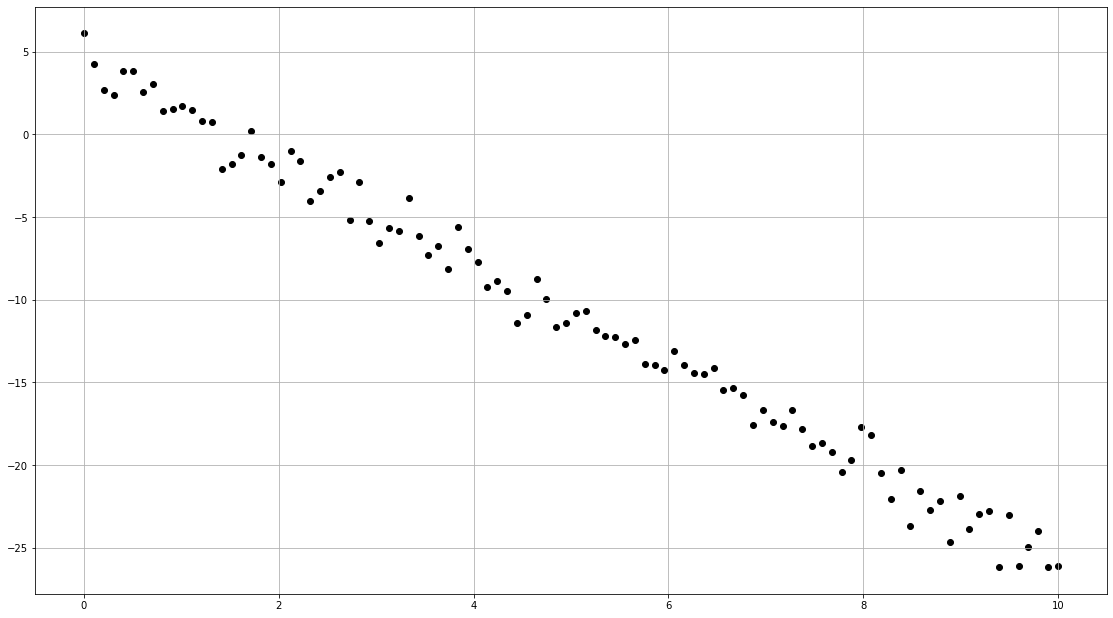

In [26]:
data = pd.DataFrame({'X':np.linspace(0, 10, 100),
                    'y':4 - 3 * np.linspace(0, 10, 100) + np.random.normal(size=100)})
fig, ax = plt.subplots(figsize=(19.20, 10.80))
ax.scatter(np.array(data.X), np.array(data.y), color='black')
ax.grid()
plt.show()

In [27]:
X = data.X.to_numpy().reshape(-1, 1)
y = data.y.to_numpy().reshape(-1, 1)

In [28]:
svm_reg = SVMRegressor(alpha=0.001, n_epochs=1000, epsilon=1.5, lr=0.1)

In [29]:
svm_reg.fit(X, y)

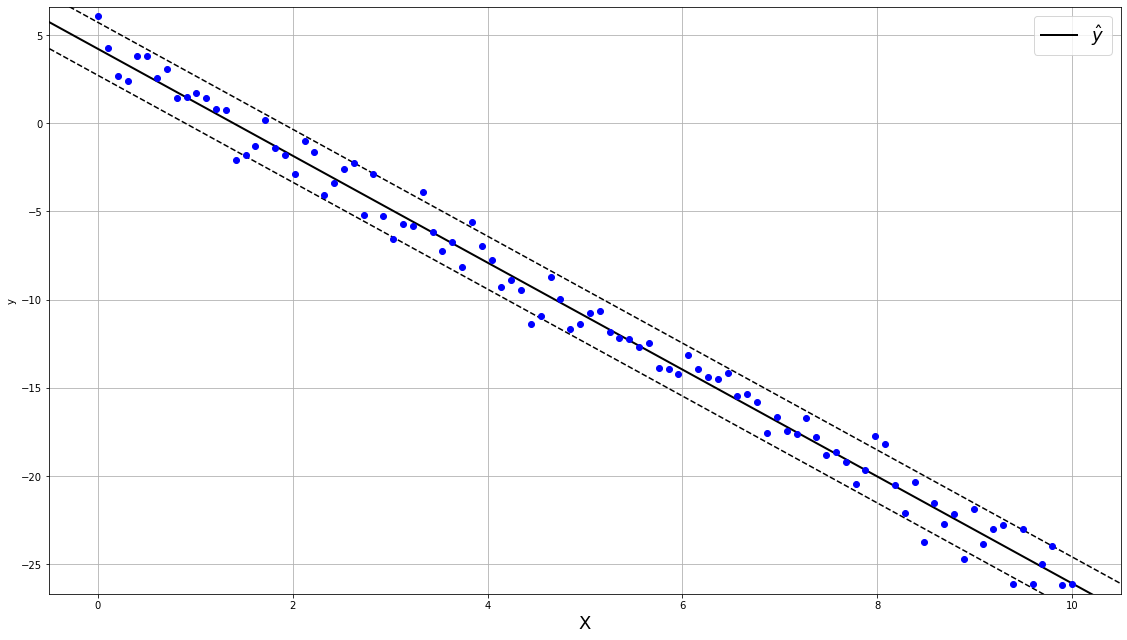

In [30]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper right", fontsize=18)
    plt.axis(axes)
    
fig = plt.figure(figsize=(19.20, 10.80))
ax = plt.axes()
plot_svm_regression(svm_reg, X, y, [X.min() - 0.5, X.max() + 0.5, y.min() - 0.5, y.max() + 0.5])
ax.grid(True)
ax.set_xlabel('X')
ax.set_ylabel('y')
plt.show()

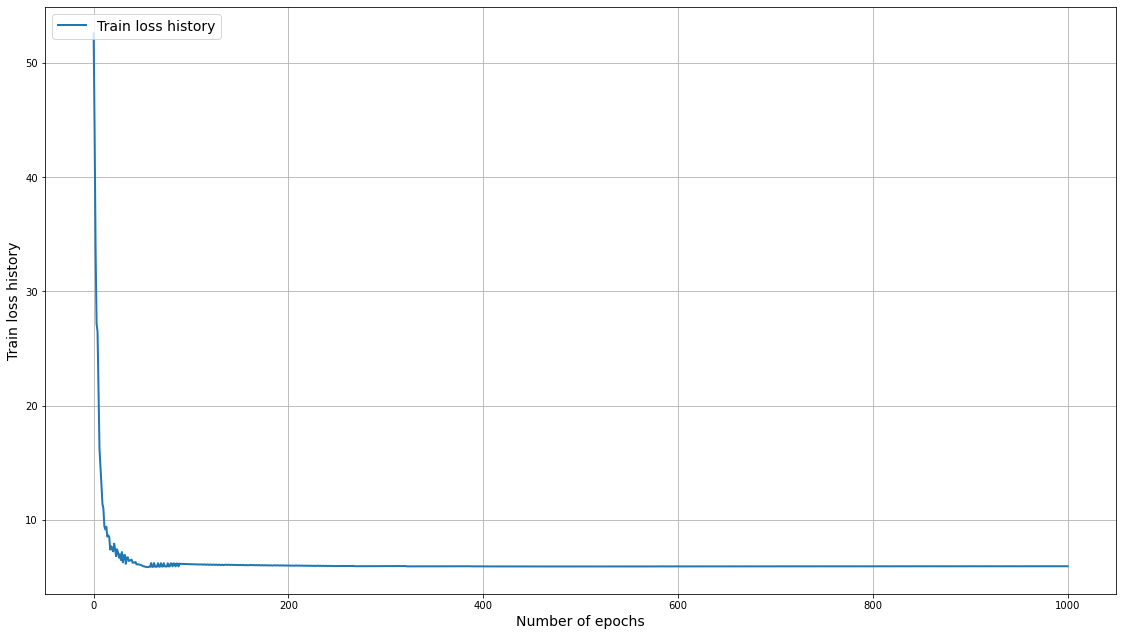

In [31]:
fig = plt.figure(figsize=(19.20, 10.80))
ax = plt.axes()
ax.plot(np.linspace(0, len(svm_reg.loss_history['train']), len(svm_reg.loss_history['train'])),\
        svm_reg.loss_history['train'], linewidth=2, label='Train loss history')
ax.set_xlabel("Number of epochs", fontsize=14)
ax.set_ylabel("Train loss history", fontsize=14)
ax.legend(loc="upper left", fontsize=14)
ax.grid(True)
plt.show()

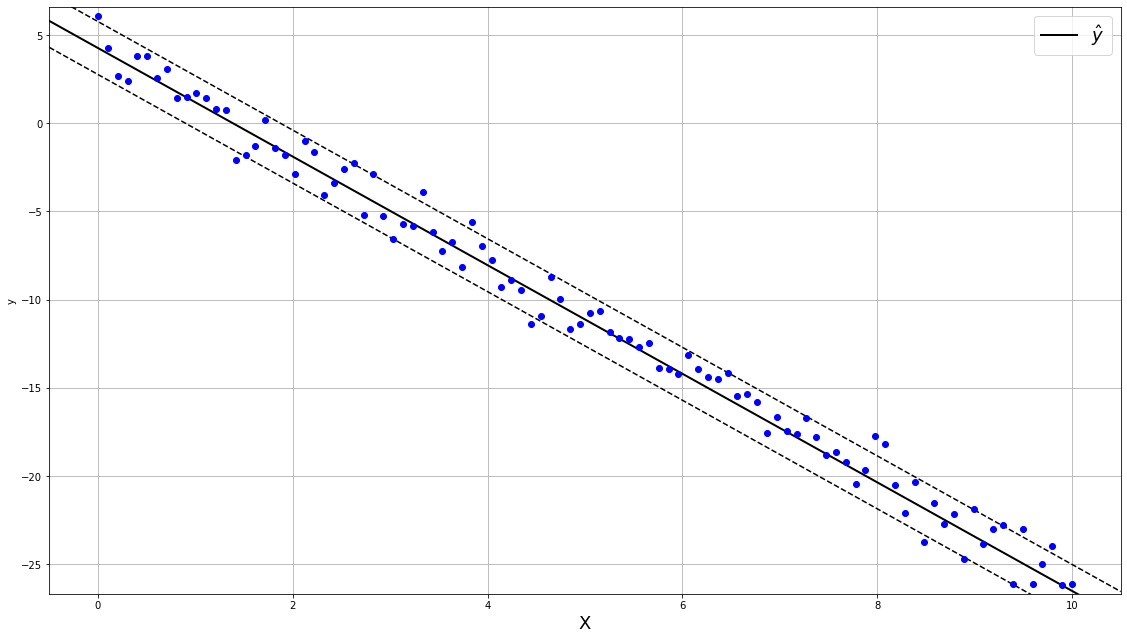

In [32]:
skl_reg = LinearSVR(epsilon = 1.5, C=10)
skl_reg.fit(X, y)
fig = plt.figure(figsize=(19.20, 10.80))
ax = plt.axes()
plot_svm_regression(skl_reg, X, y, [X.min() - 0.5, X.max() + 0.5, y.min() - 0.5, y.max() + 0.5])
ax.grid(True)
ax.set_xlabel('X')
ax.set_ylabel('y')
plt.show()

In [33]:
svm_reg.w, svm_reg.b, skl_reg.coef_, skl_reg.intercept_

(array([[-3.02871042]]),
 array([4.2130625]),
 array([-3.07633284]),
 array([4.2611272]))

In [34]:
data = pd.DataFrame({'X1':np.linspace(0, 10, 100),
                     'X2':np.linspace(0, 10, 100) ** 2,
                    'y': 2 + np.linspace(0, 10, 100) + 0.5 * np.linspace(0, 10, 100) ** 2 + np.random.normal(size=100)})

In [35]:
X_train = np.c_[data.X1.to_numpy().reshape(-1, 1), data.X2.to_numpy().reshape(-1, 1)]
y_train = data.y.to_numpy().reshape(-1, 1)

In [36]:
svm_reg = SVMRegressor(alpha=0.001, n_epochs=1000, epsilon=1.5, lr=0.1)
svm_reg.fit(X_train, y_train)

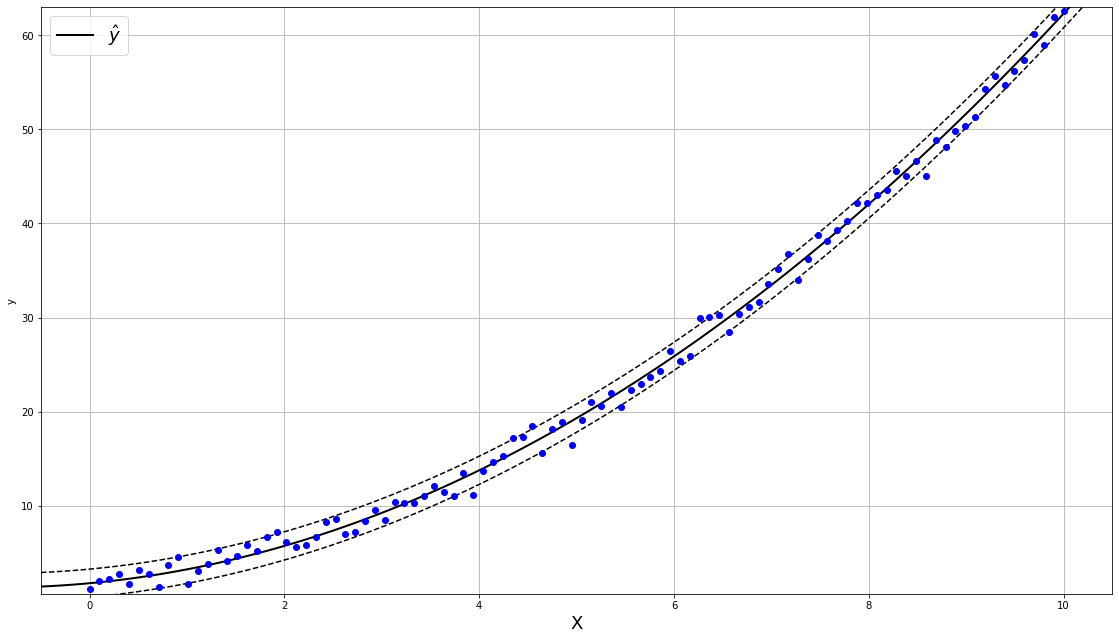

In [37]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    poly = PolynomialFeatures(degree = 2, include_bias=False)
    x1s = poly.fit_transform(x1s)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s[:, 0], y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s[:, 0], y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s[:, 0], y_pred - svm_reg.epsilon, "k--")
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

fig = plt.figure(figsize=(19.20, 10.80))
ax = plt.axes()
plot_svm_regression(svm_reg, X_train[:, 0], y_train,\
                    [X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5, y_train.min() - 0.5, y_train.max() + 0.5])
ax.grid(True)
ax.set_xlabel('X')
ax.set_ylabel('y')
plt.show()

In [38]:
svm_reg.w, svm_reg.b

(array([[0.96606124, 0.50901189]]), array([1.74922558]))

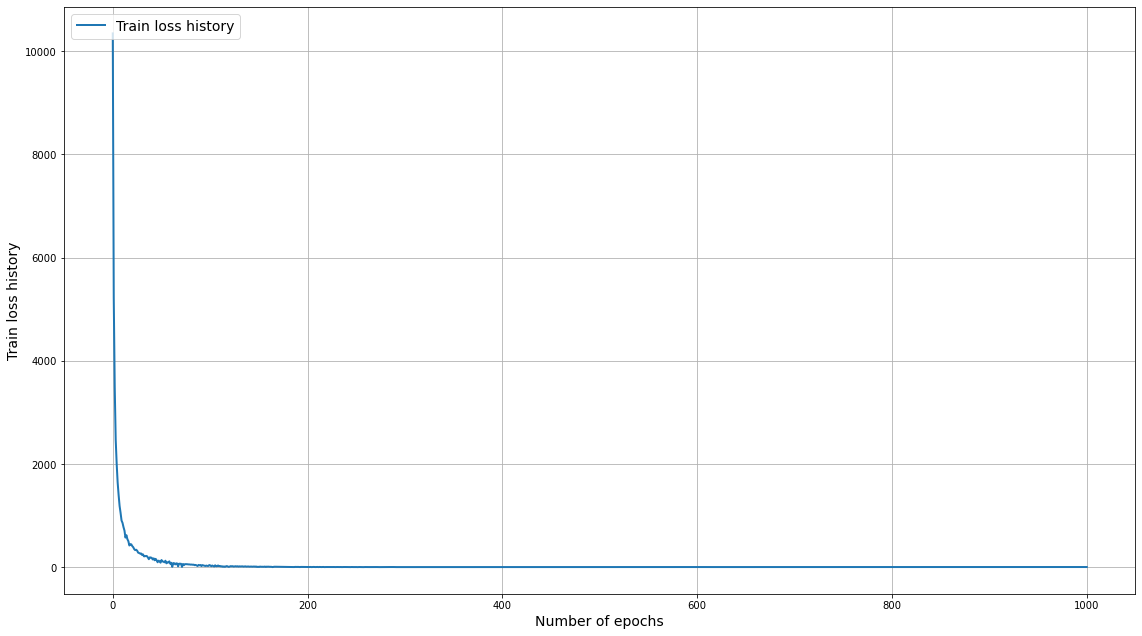

In [39]:
fig = plt.figure(figsize=(19.20, 10.80))
ax = plt.axes()
ax.plot(np.linspace(0, len(svm_reg.loss_history['train']), len(svm_reg.loss_history['train'])),\
        svm_reg.loss_history['train'], linewidth=2, label='Train loss history')
ax.set_xlabel("Number of epochs", fontsize=14)
ax.set_ylabel("Train loss history", fontsize=14)
ax.legend(loc="upper left", fontsize=14)
ax.grid(True)
plt.show()

In [40]:
with open('./style.css', 'r') as f:
    style = f.read()
HTML(style)